In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd  

In [2]:
# Perceptron je jednoducha forma neuronovej siete 
# vstupy -  1-bias,x1,x2,x3, 
# váhy - w0,w1,w2,w3,


# (1)----w0-->
# (x1)---w1--> (net_input)---->(aktivacna funkcia)-->vysledok
# (x2)---w2-->
# (x3)---w3-->

In [3]:
class Perceptron():   # trieda Perceptron
    
    # Konštruktor, počet iterácií a rychlosť učenia
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10):  
        
        self.eta = rychlost_ucenia
        self.n_iter = pocet_iteracii
    # Metodá učenia eviduje váhy w a chyby pri každej iterácii čiže pri každom prepehnutí
    # Pole váh bude pole núl. Počet prvkov poľa bude vždy o 1 väčší, než počet prvkov, ktoré do poľa prišli. prvím prvkom je vždy bias 
    def fit(self, x,y):
        self.vahy = np.zeros(1+ x.shape[1])
        self.errors_=[]  
        
        for i in range(self.n_iter):
            errors = 0
            
            for matica,vystup in zip(x,y):
                update = self.eta * (vystup-self.predikcia(matica))
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                errors += int(update !=0.0)
                
            self.errors_.append(errors)        
        
        return self  
    
    # vstup bez vád (čisty vstup)
    def net_input(self, x):
        return np.dot(x, self.vahy[1:])+ self.vahy[0]

    # Predvidatelnosť mi vráti 0 alebo 1 ( predikcia prvkov )
    def predikcia(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)
        

In [4]:
#načítanie csv suboru pomocou pandas knižnice
df = pd.read_csv("kosatec_data.csv",header = None)  
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,kosatec_sibirsky
1,4.9,3.0,1.4,0.2,kosatec_sibirsky
2,4.7,3.2,1.3,0.2,kosatec_sibirsky
3,4.6,3.1,1.5,0.2,kosatec_sibirsky
4,5.0,3.6,1.4,0.2,kosatec_sibirsky
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,kosatec_bezlisty
146,6.3,2.5,5.0,1.9,kosatec_bezlisty
147,6.5,3.0,5.2,2.0,kosatec_bezlisty
148,6.2,3.4,5.4,2.3,kosatec_bezlisty


In [5]:
# berie prvych 100 riadkov
# iloc - integer location
x = df.iloc[0:100, [0,2]].values
print(x)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [6]:
# vypíše prvých 100
y = df.iloc[0:100, 4].values
y

array(['kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirs

In [7]:
#vypíše -1 kde je kosatec sibírky a kde je 1 tak je inej farby 
skup1 = np.where(y == "kosatec_sibirsky", -1, 1) 
skup1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

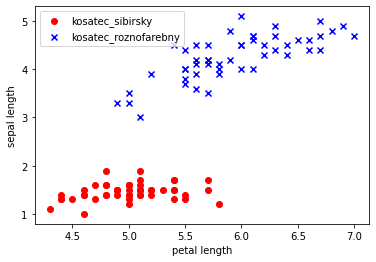

In [8]:
# Z poľa X vykreslím prvých 50 riadkov v stĺpci 0 a 1  
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='kosatec_sibirsky')

# Z poľa X si vykreslím druhých 50 riadkov toho istého 0 1
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='kosatec_roznofarebny')

plt.xlabel('petal length')
plt.ylabel('sepal length')

plt.legend(loc='upper left')

plt.show()

#dáta sú lineárne separovateľné

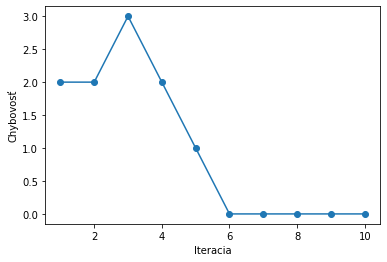

In [9]:
#trenujeme preceptron na zaklade dát čo sme dali 
#inštancia triedy perceptrón, rýchlosť učenia nastavená na 0.1 a počet iterácii na 10

pn = Perceptron(0.1, 10)
pn.fit(x, skup1)

plt.plot(range(1, len(pn.errors_) + 1), pn.errors_, marker='o')
plt.xlabel('Iteracia')
plt.ylabel('Chybovosť')
plt.show()

# tu vidíme kedy percentron začne kornvegovať, čiže až na 6tej iteracií

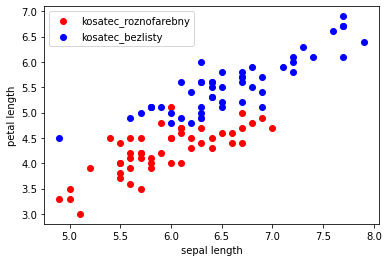

In [10]:
x = df.iloc[0:150, [0,2]].values

# teraz vypisujem od z pola 50:100 z 0 1 hodnotami 
plt.scatter(x[50:100,0],x[50:100,1],color='red',label='kosatec_roznofarebny')
# tu zas vypisujem 100:150 
plt.scatter(x[100:150,0],x[100:150,1],color='blue',label='kosatec_bezlisty')


plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.legend()
plt.show()

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


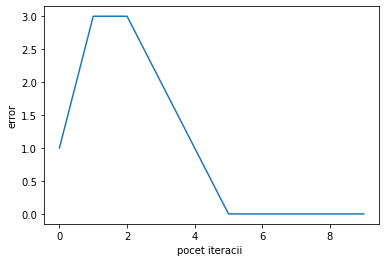

In [11]:
skup2=np.where(y=='kosatec_roznofarebny',-1,1) 
ppn=Perceptron(0.1, 10)

ppn.fit(x,skup2)

print(ppn.errors_)
plt.plot(ppn.errors_)

plt.xlabel('pocet iteracii ') #number of epochs(počet prejdení po datasete)
plt.ylabel('error')
plt.show()#zobrazenie grafu

[1, 3, 3, 3, 2, 2, 2, 2, 2, 2]


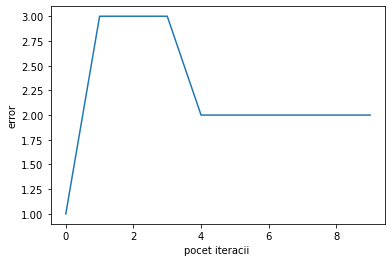

In [12]:
x = df.iloc[0:150, [0,2]].values # nastavenie hodnôt a iterácií 
y = df.iloc[0:150, 4].values
skup3=np.where(y=='kosatec_bezlisty',-1,1)# v 5 stplci ak sa nachádza tak bude chytať hodnoty 
ppn=Perceptron(0.1, 10)# nastavenie rychhlosti perceptrona

ppn.fit(x,skup3)

print(ppn.errors_)
plt.plot(ppn.errors_)

plt.xlabel('pocet iteracii ') #number of epochs(počet prejdení po datasete)
plt.ylabel('error')
plt.show() #zobrazenie grafu

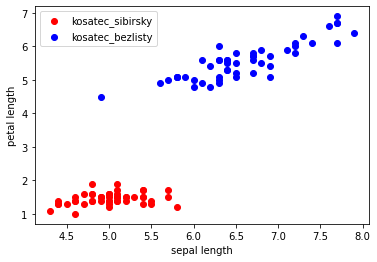

In [13]:
# musíme si načítať väčšiu inštanciu od 0:150 aby nám zobralo aj kosatec_bezlisty
x = df.iloc[0:150, [0,2]].values

plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='kosatec_sibirsky')
# tu zas vypisujem 100:150 
plt.scatter(x[100:150, 0],x[100:150, 1],color='blue', marker='o', label='kosatec_bezlisty')


plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.legend() # grafi sa len porovnavjú medzi sebou podla hodnouť a podľa iterácií kde sa ktorý nachádza
plt.show()

In [1]:
sorted_dataset= dataset.sort_values(by=["Country"], ascending=False)

sorted_dataset.head()

sorted_dataset= sorted_dataset.iloc[1:]

sorted_dataset.to_excel(r'simko,skuška.xlsx', sheet_name = 'main', index=None)

df= pd.read_excel("simko,skuška.xlsx")


NameError: name 'dataset' is not defined